# Principal Components Analysis for Dimensionality Reduction

This notebook will cover how to use dimensionality reduction and compare and contrast a regression model with and without dimensionality reduction being used

In [1]:
import pandas as pd
import numpy as np

### Download the Wine data set

<b>Download link: </b>https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

<b>Summary:</b> Given 11 features representing information about a number of white wines, predict its quality score

<b>Notes:</b>
* The file comes with headers, but we specify them explicitly to be in our desired format
* Since we're using our own headers, we skip the first row of the csv file which has the header


In [2]:
wine_data = pd.read_csv('data/winequality-white.csv', 
                        names=['Fixed Acidity', 
                               'Volatile Acidity', 
                               'Citric Acid', 
                               'Residual Sugar', 
                               'Chlorides', 
                               'Free Sulfur Dioxide', 
                               'Total Sulfur Dioxide', 
                               'Density', 
                               'pH', 
                               'Sulphates', 
                               'Alcohol', 
                               'Quality'
                              ],
                        skiprows=1,
                        sep=r'\s*;\s*', engine='python')
wine_data.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### 7 Unique values. So wild guesses will be right about 14% of the time

In [3]:
wine_data['Quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

### Define training and test data
Since all the data is already numeric, no conversions are necessary

In [4]:
X = wine_data.drop('Quality', axis=1)
Y = wine_data['Quality']

from sklearn import preprocessing
X = preprocessing.scale(X)

from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Define the benchmark SVM Classifier
We check how our model works with all the features without any transformations

In [5]:
from sklearn.svm import LinearSVC

clf_svc = LinearSVC(penalty='l1', dual=False, tol=1e-3)
clf_svc.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
          verbose=0)

#### Check the accuracy of the model

In [6]:
accuracy = clf_svc.score(x_test, y_test)
print(accuracy)

0.49183673469387756


#### Plot a heatmap displaying the correlation between features

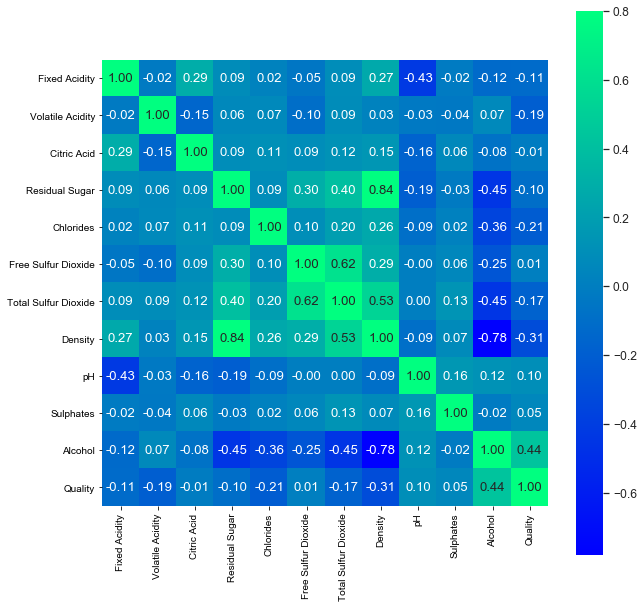

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = wine_data.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.1)
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = "winter")
plt.show()

### Use PCA for dimensionality reduction
* <b>n_components: </b>Sets the number of dimensions
* <b>whiten: </b>Before projecting the data to the principal components, the data will be normalized so that they have close to identity covariance. This has the effect of preventing one factor which has a high variance from being given too much importance

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, whiten=True)
X_reduced = pca.fit_transform(X)

#### View the eigen values of each principal component in decreasing order

In [9]:
pca.explained_variance_

array([3.2229119])

#### Eigen values expressed as a ratio

In [10]:
pca.explained_variance_ratio_

array([0.29293217])

#### Generating a Scree Plot
Can be used to visualize the Explained Variance and eliminate 

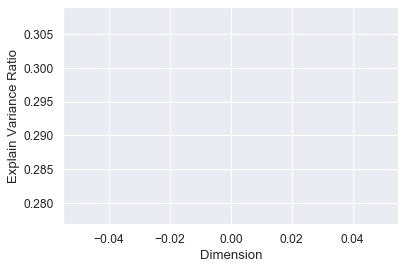

In [11]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Dimension')
plt.ylabel('Explain Variance Ratio')
plt.show()

In [12]:
X_train, x_test, Y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=0)
clf_svc_pca = LinearSVC(penalty='l1', dual=False, tol=1e-3)
clf_svc_pca.fit(X_train, Y_train)

accuracy = clf_svc_pca.score(x_test, y_test)
print(accuracy)

0.44081632653061226
